## learning-AI : hyuk_install_pytorch
### topic 1 : 0강 ~ 1강 

<br>

- **임규연 (lky473736)**
- 2025.07.17.
- Reference
    - https://www.youtube.com/watch?v=gzJt_qjZJ7M&list=PL_iJu012NOxdhFmM2aw6bwpZTMFdsPxws

------

### 이 강의를 듣는 이유

- 이 강의를 듣는 목적 
    - 1년 동안 AI 책도 많이 읽고 강좌도 많이 들었으니, 내가 정확하게 얼마나 알고 있는지 테스트하는 용도 + 파이토치 공부
- 이 강의를 그러면 언제까지 끝낼거냐
    - 7월 안까지 (NAVER_BASIC_AI_2와 함께)
    - 8월달부터 할 것
        - (1) 2025-1학기 딥러닝 복습 + 거기 나왔던 파이토치 코드 다시 작성
        - (2) learning-ai에 있는 모든 tensorflow 코드 전부 pytorch로 변환
        - (3) 2024-여름학기 빅데이터분석개론에서 배운 코드 다시 복습 (2학기에 배울 데이터처리프로그래밍이랑 똑같은 내용이니깐)


------

### 1-1강. torch.tensor()와 텐서 기본 연산

In [1]:
import torch
a = torch.Tensor([1, 2, 3, 4]) # 행벡터
print (a)
# print (a.info()) <-- 안됨. df에서만 됨
print (a.shape)
print (a.dtype)
print (type(a))

tensor([1., 2., 3., 4.])
torch.Size([4])
torch.float32
<class 'torch.Tensor'>


In [2]:
b = torch.Tensor([1, 2, 3.5, 6])
print (b)
print (b.dtype)  # 하나라도 실수 있으면 실수 타입 텐서
print (b.shape)

tensor([1.0000, 2.0000, 3.5000, 6.0000])
torch.float32
torch.Size([4])


In [3]:
c = torch.Tensor([[1, 2 ,3], 
                  [0, 1, 2], 
                  [0, -1, 1.5]]) # 2차원 행렬
print (c)
print (c.dtype)
print (c.shape)
print (c.ndim) # dimension 수 == 차원 수 (행렬이니깐 2)
print (c.numel()) # attribute 수 (3 * 3 == 9)

tensor([[ 1.0000,  2.0000,  3.0000],
        [ 0.0000,  1.0000,  2.0000],
        [ 0.0000, -1.0000,  1.5000]])
torch.float32
torch.Size([3, 3])
2
9


In [4]:
print (torch.zeros(5)) # 0 5개의 벡터
print (torch.zeros_like(a)) # a 사이즈인 0텐서
print (torch.zeros_like(c))
print (torch.zeros(3, 5)) # 3 by 5

tensor([0., 0., 0., 0., 0.])
tensor([0., 0., 0., 0.])
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [5]:
print (torch.arange(3, 10, 2)) # range랑 같은데 tensor로 만듦
print (torch.arange (0.1, 0.9, 0.05))
print (torch.linspace(0, 1, 10)) # 0~1 10개의 수 (등간격 == linear space)
print (torch.linspace(100, 200, 3))

tensor([3, 5, 7, 9])
tensor([0.1000, 0.1500, 0.2000, 0.2500, 0.3000, 0.3500, 0.4000, 0.4500, 0.5000,
        0.5500, 0.6000, 0.6500, 0.7000, 0.7500, 0.8000, 0.8500])
tensor([0.0000, 0.1111, 0.2222, 0.3333, 0.4444, 0.5556, 0.6667, 0.7778, 0.8889,
        1.0000])
tensor([100., 150., 200.])


In [6]:
a = torch.Tensor([1, 2, 3, 1, 2, 3])
b = torch.Tensor([2, 3, 4, -1, 2, 0])

print (a + b) 
print (a - b) 
print (0 * a + b)
print (a @ b) # dot product (내적)
print (a * b) # element-wise multiplication
print (a**2)

tensor([3., 5., 7., 0., 4., 3.])
tensor([-1., -1., -1.,  2.,  0.,  3.])
tensor([ 2.,  3.,  4., -1.,  2.,  0.])
tensor(23.)
tensor([ 2.,  6., 12., -1.,  4.,  0.])
tensor([1., 4., 9., 1., 4., 9.])


In [7]:
print (c)

d = torch.Tensor([[1, 0, 0],
                  [0, 1, 0], 
                  [0, 0, 1]])
print (d @ c)

tensor([[ 1.0000,  2.0000,  3.0000],
        [ 0.0000,  1.0000,  2.0000],
        [ 0.0000, -1.0000,  1.5000]])
tensor([[ 1.0000,  2.0000,  3.0000],
        [ 0.0000,  1.0000,  2.0000],
        [ 0.0000, -1.0000,  1.5000]])


----

### 1-2 ~ 1-3강. 파이토치 tensor의 indexing

In [11]:
a = torch.Tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])

print (a[0])
print (a[1])
print (a[-1])
print (a[-2])
print (a[0:3])
print (a[3:])
print (a[:4])
print (a[:])
print (a[:-1])
# print (a[::-1]) 파이토치에서는 뒤집기가 안되나봄
print ([1, 2, 3][::-1])

tensor(1.)
tensor(2.)
tensor(9.)
tensor(8.)
tensor([1., 2., 3.])
tensor([4., 5., 6., 7., 8., 9.])
tensor([1., 2., 3., 4.])
tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.])
tensor([1., 2., 3., 4., 5., 6., 7., 8.])
[3, 2, 1]


In [30]:
print (c, end='\n\n----------\n')

print (c[0]) # 0번째 행
print (c[1][1]) # 1번째 행 1번째 열
print (c[1, 2]) # 1번째 행 2번째 열
print (c[:]) # 전체
print (c[-1]) # 맨 마지막 행
print (c[1:]) # 1번째행 ~ 마지막행
print (c[1:None]) # 1번째행 ~ 마지막행 (None써도 됨)
print (c[0:2]) # 0~1 행

#########
 
print (c[:, 2])  # <-- 모든 행이면서, 두번째 열 쭉
print (c[:][2]) # 모든 행인데, 그 행에서 두번째것

########

print (c[1, 0:2:2]) # (1번째 행, 0부터 2까지) 2 간격

tensor([[ 1.0000,  2.0000,  3.0000],
        [ 0.0000,  1.0000,  2.0000],
        [ 0.0000, -1.0000,  1.5000]])

----------
tensor([1., 2., 3.])
tensor(1.)
tensor(2.)
tensor([[ 1.0000,  2.0000,  3.0000],
        [ 0.0000,  1.0000,  2.0000],
        [ 0.0000, -1.0000,  1.5000]])
tensor([ 0.0000, -1.0000,  1.5000])
tensor([[ 0.0000,  1.0000,  2.0000],
        [ 0.0000, -1.0000,  1.5000]])
tensor([[ 0.0000,  1.0000,  2.0000],
        [ 0.0000, -1.0000,  1.5000]])
tensor([[1., 2., 3.],
        [0., 1., 2.]])
tensor([3.0000, 2.0000, 1.5000])
tensor([ 0.0000, -1.0000,  1.5000])
tensor([0.])


In [ ]:
a = torch.Tensor([[[1, 2, 3, 4, 5],
                  [6, 7, 8, 9, 10]],
                  [[0, 1, 2, 3, 4], 
                  [5, 6, 7, 8, 9]]])
print (a.shape) # 2개의 행렬이 2 by 5
print (a[0])
print (a[0][0][0])
print (a[:][1][0][0])
print (a[1, 1, 3])

new = torch.Tensor([[[[1, 2, 3 ,4]]]])
print (new.shape)

torch.Size([2, 2, 5])
tensor([[ 1.,  2.,  3.,  4.,  5.],
        [ 6.,  7.,  8.,  9., 10.]])
tensor(1.)
tensor(0.)
tensor(8.)
torch.Size([1, 1, 1, 4])


In [38]:
print (a)

print (a[[0, 0, 0],
         [1, 1, 1],
         [1, 2, 3]]) 

b = torch.Tensor([[[[[1, 2, 3, 4], 
       [5, 6, 7, 8], 
       [9, 10, 11, 12]]]]])

print (b[[0, 0, 0, 0], 
         [0, 0, 0, 0], 
         [0, 0, 0, 0], 
         [2, 2, 1, 1],
         [0, 1, 2, 3]]) 
# (0, 0, 0, 2, 0), (0, 0, 0, 2, 1) ...
# 9, 10, 7, 8

# a[] : 인덱스를 하겠다
# [[X, Y, Z], [a, b, c]] : 1행 3열짜리 벡터
# ==> [(X, a), (Y, b), (Z, c)]

tensor([[[ 1.,  2.,  3.,  4.,  5.],
         [ 6.,  7.,  8.,  9., 10.]],

        [[ 0.,  1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.,  9.]]])
tensor([7., 8., 9.])
tensor([ 9., 10.,  7.,  8.])


In [ ]:
# boolean indexing

a = [1, 2, 3, 4, 5, 6]
print (a==3) # 여러개 값 들어있는 리스트 != 3

a = torch.Tensor([[1, 2, 3, 4], 
                  [5, 6, 7, 8]])
print (a>3) # 3보다 큰 요소는 True, 나머지는 False
print (a==3)
print (a[a>3]) # 3보다 큰 요소만 벡터로 출력

a[a>3] = 10 # 3보다 큰 요소는 전부 10으로 바꿔라
print (a)

a[a%2 == 0] = 0 # 짝수는 전부 0으로
a[a%2 != 0] = 1 # 홀수는 전부 1로

print (a)

b = torch.Tensor([1, 2, 3, 1])
print (b[[True, True, True, False]]) # 4번째는 출력 x

False
tensor([[False, False, False,  True],
        [ True,  True,  True,  True]])
tensor([[False, False,  True, False],
        [False, False, False, False]])
tensor([4., 5., 6., 7., 8.])
tensor([[ 1.,  2.,  3., 10.],
        [10., 10., 10., 10.]])
tensor([[1., 0., 1., 0.],
        [0., 0., 0., 0.]])
tensor([1., 2., 3.])


In [62]:
# tensor indexing

a = torch.tensor([1, 2, 3, 4, 5])
k = a[2]
print (k)

k = a[torch.tensor(2)]
print (k)

k = a[torch.tensor([2, 3, 4])]
print (k) # 3, 4, 5

k = a[torch.tensor([[2, 2, 2], 
                    [3, 3, 3]])]
print (k) 

k = a[torch.tensor([[0, 1, 2, 3, 4], 
                   [4, 3, 1, 2, 0]])]
print (k)

b = torch.tensor([[1, 2, 3],
                 [4, 5, 6]])
print (b)

k = b[torch.tensor(0)]
print (k) 

k = b[torch.tensor([[0, 1], [1, 1]])]
print (k)

tensor(3)
tensor(3)
tensor([3, 4, 5])
tensor([[3, 3, 3],
        [4, 4, 4]])
tensor([[1, 2, 3, 4, 5],
        [5, 4, 2, 3, 1]])
tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([1, 2, 3])
tensor([[[1, 2, 3],
         [4, 5, 6]],

        [[4, 5, 6],
         [4, 5, 6]]])


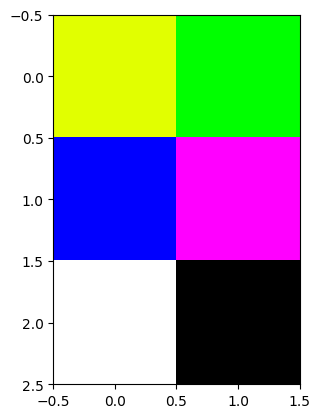

In [65]:
# tensor indexing visualization

import matplotlib.pyplot as plt

b = torch.tensor([
    [225,255,0],
    [0,255,0],
    [0,0,255],
    [255,0,255],
    [70,80,75],
    [0,0,4],
    [60,100,255],
    [255, 255, 255],
    [0, 0, 0]
], dtype=torch.uint8) 

indices = torch.tensor([[0,1], [2,3], [7, 8]])
image = b[indices]

plt.imshow(image)
plt.show()


In [88]:
a = torch.tensor([[1, 2, 3], 
                  [4, 5, 6]])

A = a[torch.tensor([[0, 1], [1, 1]])]
# [[[1, 2, 3], [4, 5, 6]]
# [[4, 5, 6], [4, 5, 6]]]

B = torch.tensor([[list(a[0]), list(a[1])], 
                  [list(a[1]), list(a[1])]]) 

print (A)
print (B)

tensor([[[1, 2, 3],
         [4, 5, 6]],

        [[4, 5, 6],
         [4, 5, 6]]])
tensor([[[1, 2, 3],
         [4, 5, 6]],

        [[4, 5, 6],
         [4, 5, 6]]])


------

### 1-4강. functions
- 파이토치에서 수학과 관련된 함수는 안에가 반드시 tensor 형이어야 함

In [ ]:
a = torch.randn(3, 3) # 3 by 3의 행렬 (정규분포)
b = torch.rand(3, 3) # uniform (0~1)
c = torch.zeros(3, 3) # 0으로 다 채우기
d = torch.zeros_like(c) # c모양으로 0 다 채우기
e = torch.linspace(1, 10, 5)

for k in [a, b, c, d, e] : 
    print (k)

tensor([[-0.7372,  0.2599, -0.4333],
        [-0.2909,  0.1141,  0.4733],
        [-1.0961, -1.7893, -2.2787]])
tensor([[0.4337, 0.9295, 0.6726],
        [0.5664, 0.0288, 0.3329],
        [0.9187, 0.0243, 0.8562]])
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([ 1.0000,  3.2500,  5.5000,  7.7500, 10.0000])


In [99]:
print (a)
print (torch.abs(a)) # 절댓값
print (torch.sqrt(torch.abs(a))) # 절댓값 -> 제곱근
print (torch.exp(a)) # e위에 지수
print (torch.log(torch.abs(a))) # 자연로그
print (torch.log10(torch.tensor(10))) # 1이 나올것임 log_10{10}
print (torch.log2(torch.tensor(2**(torch.exp(torch.tensor(1))))))
print (torch.round(A)) # 반올림

tensor([[-0.7372,  0.2599, -0.4333],
        [-0.2909,  0.1141,  0.4733],
        [-1.0961, -1.7893, -2.2787]])
tensor([[0.7372, 0.2599, 0.4333],
        [0.2909, 0.1141, 0.4733],
        [1.0961, 1.7893, 2.2787]])
tensor([[0.8586, 0.5098, 0.6583],
        [0.5394, 0.3378, 0.6879],
        [1.0469, 1.3377, 1.5096]])
tensor([[0.4784, 1.2967, 0.6483],
        [0.7476, 1.1209, 1.6052],
        [0.3342, 0.1671, 0.1024]])
tensor([[-0.3049, -1.3476, -0.8362],
        [-1.2347, -2.1706, -0.7481],
        [ 0.0917,  0.5818,  0.8236]])
tensor(1.)
tensor(2.7183)
tensor([[[1, 2, 3],
         [4, 5, 6]],

        [[4, 5, 6],
         [4, 5, 6]]])


/var/folders/_z/gryfr07n59jgb3wrd062h1ym0000gn/T/ipykernel_89756/3621356374.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print (torch.log2(torch.tensor(2**(torch.exp(torch.tensor(1))))))


In [101]:
deg_30, deg_60, deg_90 = torch.pi/6, torch.pi/3, torch.pi/2

print (torch.sin(torch.tensor(deg_30)))
print (torch.sin(torch.tensor(deg_60)))
print (torch.sin(torch.tensor(deg_90)))

print (torch.cos(torch.tensor(deg_30)))
print (torch.cos(torch.tensor(deg_60)))
print (torch.cos(torch.tensor(deg_90)))

print (torch.tan(torch.tensor(deg_30)))
print (torch.tan(torch.tensor(deg_60)))
print (torch.tan(torch.tensor(deg_90)))

tensor(0.5000)
tensor(0.8660)
tensor(1.)
tensor(0.8660)
tensor(0.5000)
tensor(-4.3711e-08)
tensor(0.5774)
tensor(1.7321)
tensor(-22877332.)


In [104]:
print (torch.nan)  # <--- not num
print (torch.log(torch.tensor(-1))) # 진수에 -1은 정의가 안되기 때문에 안됨 == nan
print (torch.isnan(torch.log(torch.tensor(-1))))
print (torch.isinf(torch.tensor([1, 2, torch.inf])))

nan
tensor(nan)
tensor(True)
tensor([False, False,  True])


In [ ]:
A = torch.rand(2, 2)
print (A)

print (torch.min(A))
print (torch.min(A, dim=0)) # 열을 기준으로 작은거
print (torch.min(A, dim=1)) # 행을 기준으로 작은거

print ('-' * 25)

print (torch.max(A))
print (torch.max(A, dim=0)) # 열을 기준으로 큰거
print (torch.max(A, dim=1)) # 행을 기준으로 큰거

print ('-' * 25)

print (torch.argmax(A)) # 가장 큰 것이 존재하는 그 인덱스 (가로로 셈)
print (torch.argmin(A)) # 가장 작은것이 존재하는 그 인덱스 (가로로 셈)

print ('-' * 25)

c = torch.tensor([[1, 2, 3, 4, 5, 6, 7],
                  [8, 9, 100000, 11, 12, 13, 14]])
print (torch.argmax(c)) # 9
print (torch.argmax(c, dim=0)) # 각 열에서 어떤 인덱스가 큰가?

tensor([[0.5041, 0.4446],
        [0.1058, 0.4823]])
tensor(0.1058)
torch.return_types.min(
values=tensor([0.1058, 0.4446]),
indices=tensor([1, 0]))
torch.return_types.min(
values=tensor([0.4446, 0.1058]),
indices=tensor([1, 0]))
-------------------------
tensor(0.5041)
torch.return_types.max(
values=tensor([0.5041, 0.4823]),
indices=tensor([0, 1]))
torch.return_types.max(
values=tensor([0.5041, 0.4823]),
indices=tensor([0, 1]))
-------------------------
tensor(0)
tensor(2)
-------------------------
tensor(9)
tensor([1, 1, 1, 1, 1, 1, 1])


In [138]:
a = (torch.rand(30) * 1000).int()
print (a)

print (a.sort().values)
print (a.sort(descending=True))

b = (torch.rand(3, 3) * 1000).int()
print(b)

print (b.sort(dim=0)) # 열 기준으로 정렬해라
print (b.sort(dim=1)) # 행 기준으로 정렬해라

tensor([533, 404, 413, 677, 356, 966, 814, 953, 726, 899, 999, 605, 848, 527,
        439, 289, 676, 667,  88, 776, 638, 492, 541, 375, 687, 296, 291, 298,
        231, 621], dtype=torch.int32)
tensor([ 88, 231, 289, 291, 296, 298, 356, 375, 404, 413, 439, 492, 527, 533,
        541, 605, 621, 638, 667, 676, 677, 687, 726, 776, 814, 848, 899, 953,
        966, 999], dtype=torch.int32)
torch.return_types.sort(
values=tensor([999, 966, 953, 899, 848, 814, 776, 726, 687, 677, 676, 667, 638, 621,
        605, 541, 533, 527, 492, 439, 413, 404, 375, 356, 298, 296, 291, 289,
        231,  88], dtype=torch.int32),
indices=tensor([10,  5,  7,  9, 12,  6, 19,  8, 24,  3, 16, 17, 20, 29, 11, 22,  0, 13,
        21, 14,  2,  1, 23,  4, 27, 25, 26, 15, 28, 18]))
tensor([[120, 522, 946],
        [711, 872, 708],
        [768, 878, 599]], dtype=torch.int32)
torch.return_types.sort(
values=tensor([[120, 522, 599],
        [711, 872, 708],
        [768, 878, 946]], dtype=torch.int32),
indices=tensor([

In [144]:
a = torch.rand(3)
print (a)
print (a.mean(), a.median(), a.sum(), a.std(),
       a.max(), a.min(), a.abs())

tensor([0.8197, 0.3093, 0.7601])
tensor(0.6297) tensor(0.7601) tensor(1.8891) tensor(0.2791) tensor(0.8197) tensor(0.3093) tensor([0.8197, 0.3093, 0.7601])


In [157]:
a = torch.randint(1, 11, size = (6, )) # 1에서 5 미만 6개 정수 뽑아줘
print (a, a.shape)

b = a.reshape(2, 3)
print (b, b.shape)

b = b.reshape(1, 3, 2)
print (b, b.shape)

b = b.reshape (2, -1) # -1이 들어가있으면 알아서 채워줌 -> 3으로 채워주겠지
print (b, b.shape)

b = b.reshape (1, -1) 
print (b, b.shape)

tensor([9, 1, 2, 9, 4, 2]) torch.Size([6])
tensor([[9, 1, 2],
        [9, 4, 2]]) torch.Size([2, 3])
tensor([[[9, 1],
         [2, 9],
         [4, 2]]]) torch.Size([1, 3, 2])
tensor([[9, 1, 2],
        [9, 4, 2]]) torch.Size([2, 3])
tensor([[9, 1, 2, 9, 4, 2]]) torch.Size([1, 6])


In [ ]:
# 내적과 transpose

a = torch.tensor([1, 2, 3])
b = torch.tensor([-1, -2, -3])
print (torch.sum(a * b)) # 내적 : element-wise mul->sum

a = a.reshape(3, 1)
b = b.reshape(3, 1)
print (a)
print (b)

# ~~~.transpose(1, 0) : 행과 열 바꿔라
print (a.transpose(1, 0) @ b) # A^T@B 

# ~~~.permute(A, B) : 0번째엔 A번째가, 1번째엔 B번째가
print (a.permute(1, 0) @ b)


tensor(-14)
tensor([[1],
        [2],
        [3]])
tensor([[-1],
        [-2],
        [-3]])
tensor([[-14]])
tensor([[-14]])


In [166]:
# concatenation 

A = torch.ones(3, 4)
B = torch.zeros(3, 4)
print (A, '\n', B)

C = torch.vstack([A, B]) # vertical 0번째 차원에 쌓는다 (밑에 쌓는다, 세로로 쌓는다)
D = torch.hstack([A, B]) # horizontal 0번째 차원에 쌓는다 (옆으로 쌓는다, 가로로 쌓는다)
print (C, '\n', D)

K = torch.cat([A, B], dim=0) # == vstack이랑 똑같음
print (K)

K = torch.cat([A, B], dim=1) # == hstack이랑 똑같음
print (K)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]) 
 tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]) 
 tensor([[1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0.]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0.]])


In [ ]:
A = torch.randn(1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1)
print (A, A.shape)

print (A.squeeze().shape) # <--- 필요없는 차원 없애기

tensor([[[[[[[[[[[[-0.0527],
                  [-0.5751]],

                 [[ 2.4814],
                  [ 0.5225]],

                 [[-1.8214],
                  [ 1.3131]]]]]]]]]]]]) torch.Size([1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1])
torch.Size([3, 2])
